# Week 4 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Linear models for classification

**ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0**

For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data

- If and what kind of regularization

/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


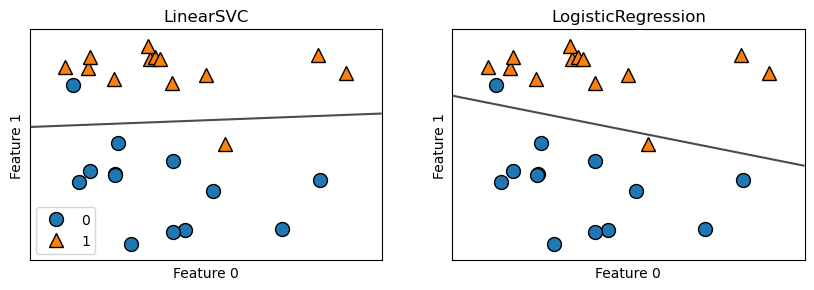

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
import mglearn

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax =ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Trainig set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score :{:.3f}".format(logreg.score(X_test, y_test)))

Trainig set score:0.958
Test set score :0.958


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model

In [37]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [39]:
logreg001 = LogisticRegression(C=0.01, max_iter=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear models for multiclass classification

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:

- **w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b**

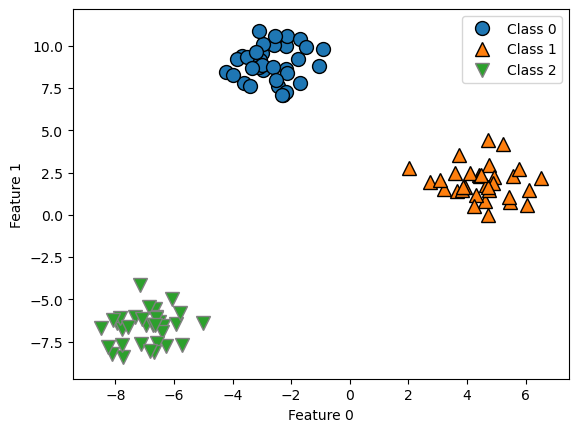

In [44]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

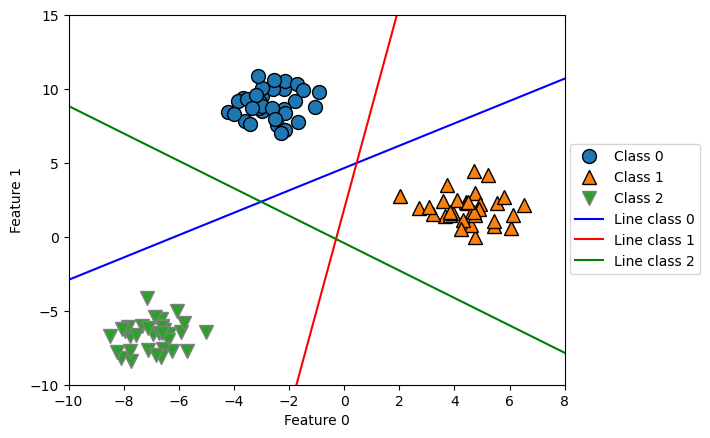

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']): 
                                  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
                                  plt.ylim(-10, 15) 
                                  plt.xlim(-10, 8) 
                                  plt.xlabel("Feature 0") 
                                  plt.ylabel("Feature 1")
                                  plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

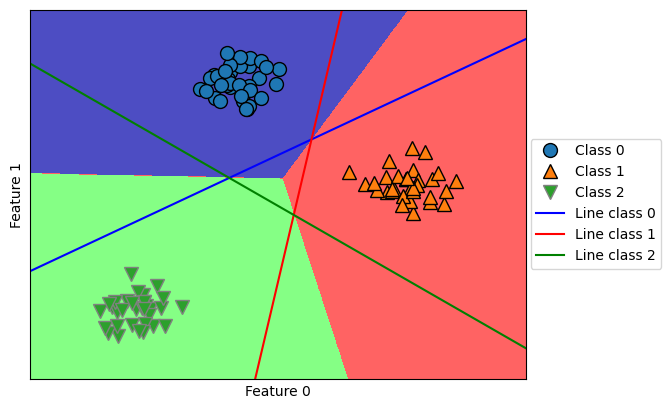

In [47]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']): 
                                  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
                                  plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
                                  plt.xlabel("Feature 0") 
                                  plt.ylabel("Feature 1")

### Strengths, weaknesses, and parameters

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.

Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.